---
> デジタルデータなんて所詮0か1さ。とはいえ、0と1の羅列だけでは意味をなさない。その意味やルールを与えたのは人間、自分が作った意味やルールに振り回されるなんて、滑稽じゃあないか。
---

# データの扱い

機械学習以外でも、データを整理したり、まとめたり、内容を知るといった処理は重要である\
ここでは、データを扱う・確認する・補正するという観点についてまとめる

## まずは準備

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# データ取得


## データセットの読み込み

ここでは、scikit-learnに含まれているデータセットを利用する

ここで利用するのは、次のデータである

- Linnerud (生理学的特徴と運動能力の関係)  
ノースカロライナ州立大学の A. C. linnerud 博士が作成した、20 人の成人男性に対してフィットネスクラブで測定した 3 つの生理学的特徴と 3 つの運動能力の関係を表すデータである

> データセットの詳細

| | |
|:-:|:-:|
|レコード数|	20|
|カラム数|	説明変数:3, 目的変数: 3|
|主な用途|	多変数回帰 (multivariate regression)|

> 説明変数の構成

| | |
|:-:|:-:|
|Weight	体重
|Waist	ウエスト (胴囲)
|Pulse	脈拍

> 目的変数の構成

| | |
|:-:|:-:|
|Chins|	懸垂の回数|
|Situps|	腹筋の回数|
|Jumps|	跳躍|

データの利用には、`from パッケージ名 import ライブラリ名`として、ライブラリが複数まとめられたパッケージから特定のライブラリをインポートする

なお、
- sklearn.datasets：scikit-learnに組み込まれているデータセットのパッケージ
- load_linnerud：linnerudデータセットを用いるためのライブラリ
である

In [118]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

ここで、説明変数としてWeight(体重)、Waist(胴囲)、Pulse(脈拍)の三つ、目的変数としてChins(懸垂の回数)、Situps(腹筋の回数)、Jumps(跳躍)を与える

linnerud.dataは以下のようなarray型のデータが表示される
```
array([[   5.,  162.,   60.],  
       [   2.,  110.,   60.],  
       ...
       [  12.,  101.,  101.],  
```

linnerud.targetを実行すると以下のようなarray型のデータが表示される
```
array([[ 191.,   36.,   50.],
       [ 189.,   37.,   52.],
       [ 193.,   38.,   58.],
       ...
```

In [119]:
linnerud.target_names

['Weight', 'Waist', 'Pulse']

In [120]:
linnerud.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [121]:
linnerud.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

データの表示方法には複数存在することに注意する
- array：Pythonで使われる配列である。なお、型は無表示である
- ndarray：配列同様、多次元のデータを格納できる構造でnumpyと対応している。なお、型はarrayと表示される
- DataFrame：2次元のデータを格納できる構造．pandasと対応している．なお、型はpandas.core.frame.DataFrameと表示される

相互変換であるが、

- pythonリスト型listをNumPy配列ndarrayに変換するにはnumpy.array()とする
- NumPy配列ndarrayをリスト型listに変換には、tolist()メソッドを使う
- ndarrayから、pandasの配列に変換するには、DataFrameメソッドを利用する



pd.DataFrame(numpyデータなど, columns=カラム名)  
- 一番左の1列をインデックスと呼び、自動でナンバリングされる。ただし0オリジンであることに注意すること
- 一番上の1行をカラムと呼び、それぞれをカラム名を定義する必要がある
  
linnerud.feature_namesを実行すると以下のようなarray型のデータが表示される

`['Chins', 'Situps', 'Jumps']``
- Chins：懸垂の回数
- Situps：腹筋の回数
- Jumps：跳躍

In [122]:
data = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
data.head(5)

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


linnerud.target_namesを実行すると以下のようなarray型のデータが表示される
```['Weight', 'Waist', 'Pulse']```
- Weight：体重
- Waist：胴囲
- Pulse：脈拍
である

In [123]:
target = pd.DataFrame(linnerud.target, columns=linnerud.target_names)
target.head(5)

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


## DataFrameの作成

dataとtargetを横方向に結合しdatargetという名前のDataFrameを作成する



- A.join(B)
- pd.concat([A, B], axis=1)
- pd.merge(A, B, right_index=True, left_index=True)
    - AもBもDataFrame

今回はjoinがもっとも素直な方法である。なお、how='outer'は省略できる

- outerは、ベン図でいう和集合になる
- inner joinでは、ベン図でいう共通部分になる

In [124]:
datarget1 = data.join(target, how='outer')
datarget1.head(3)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0


concatは、indexが共通かつ、axis=1を省略すると縦方向の連結になる
- 縦方向結合、つまり2つの表を単純に共通部分を取り除かず、単純に2つ合わせる
- 横方向結合、つまり2つの表をindexが共通する行を横に2つ合わせる

In [125]:
datarget2 = pd.concat([data, target], axis=1)
datarget2.head(3)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0


例えば、それぞれの先頭2行分を縦に連結させると次のようになる

In [126]:
datarget2d = pd.concat([data[0:2], target[0:2]], axis=0)
datarget2d

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,NaN,NaN,NaN
1,2.0,110.0,60.0,NaN,NaN,NaN
0,NaN,NaN,NaN,191.0,36.0,50.0
1,NaN,NaN,NaN,189.0,37.0,52.0


本来、mergeは共通のキーがあるときに利用する。したがって、今回は無理やりな例になる

In [127]:
datarget3 = pd.merge(data, target, right_index=True, left_index=True)
datarget3.head(3)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0


 ## CSVデータの読み込み

CSVからデータを読み込む場合について補足する

- ここでは、numpyが提供するloadtxtについて説明する

例えば、1列目が目的変数、2列目以降が説明変数となる

```
foo.csv
1,1.2,12,...
1,2.0,5,...
1,1.5,3,...
2,1.8,1,...
2,0.5,10,...
2,1.0,8,...
```

というCSVファイルがあった場合、

```
data = np.loadtxt('foo.csv', delimiter=',', dtype=float)
labels = data[:, 0:1] # 目的変数を取り出す
features = preprocessing.minmax_scale(data[:, 1:]) # 説明変数を取り出した上でスケーリング
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3) # トレーニングデータとテストデータに分割
```

とするとよい




### numpyでのコロン : およびカンマ , による配列表記

最初のコロンはスライシングのコロン(`x[1:]`におけるコロンと同じ)である。Pythonではスライシングはカンマで区切り複数記載できる

次の例では、2から5まで2飛ばし、つまり、2と4個目の要素がスライシングで選ばれる

- つまり、0から数えるので`[[7,  8,  9], [13, 14, 15]]`となる。この0列目なので、`[7,13]`となる

- 要するに、第一行だけがほしい場合は`a[0]`、第一列だけがほしい場合は`a[:,0]`となる

In [128]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
a[2:5:2, 0]

array([ 7, 13])

データの読み込み、確認手法について以上である

# データ加工

## 欠損値補完

実際に用いるデータでは欠損値が含まれることが普通にある
- データを扱うには欠損値を処理しておく必要がある
- 上記データは欠損値がないため、欠損値のあるデータを用いて説明する

今回は、自動車事故のデータセットを使う

In [129]:
import os
if not os.path.exists('nyc_collision_factors.csv'):
  #!wget "https://drive.google.com/uc?export=download&id=1bBknlKPuizAmEJD8N5kH0duCgxqO9QeO" -O nyc_collision_factors.csv
  !wget https://keio.box.com/shared/static/oitf6chpopvq8zelrq7j566md48kn83h -O nyc_collision_factors.csv

In [130]:
collisions = pd.read_csv("nyc_collision_factors.csv")

なお、上記はQuiltを利用できるが、古いシステムのため最近はインストールが困難になっている  
以下、参考までにQuiltを用いたデータ入手方法を記載する

Quiltはデータセットの公開およびバージョン管理のためのツールであり、Python,Pandas,Jupyter等を使って機械学習の開発・研究をするユーザのために設計されている

次の内容を実行セルにして実行するとよい
```
has_quilt = !if [[ -f /usr/local/bin/quilt ]]; then echo 1; fi;
if not has_quilt:
  !pip install -q quilt
  !quilt install --force ResidentMario/missingno_data
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
```



中身を確認する。

In [131]:
collisions.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLISTS INJURED,NUMBER OF CYCLISTS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,0,0,0,0,NaN,NaN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,1,0,1,0,NaN,NaN,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


大量の欠損値があるが、欠損値がnanとして記されているので、これを、データとしてのnan(np.nan)へ変更する

In [132]:
collisions.replace("nan", np.nan, inplace=True)

表示させると、nanが、NaNに変わったことがわかる

- NaNは、numpyにおけるNaNという特別な値を意味し、欠損値であることを示している
- nanは文字であり、「本当にnanという意味のある情報、例えばカレーはriceかnanかというアンケート」と混乱する場合がある
  - そこで、あえて特別な値を用いる必要がある

- NaN（Not a Number、非数、ナン）は、コンピュータにおいて、主に浮動小数点演算の結果として、不正なオペランドを与えられたために生じた場合を表す値またはシンボルであり、計算機における数字の表現の一つとして標準化されている

In [133]:
collisions.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLISTS INJURED,NUMBER OF CYCLISTS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,0,0,0,0,NaN,NaN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,1,0,1,0,NaN,NaN,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [134]:
collisions.shape

(7303, 26)

### 欠損値の数を把握する

データの数が示されているが、総数は7303で、それに満たないデータには欠損があることがわかる
- かなりのデータが欠損していることがわかる

In [135]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           7303 non-null   object 
 1   TIME                           7303 non-null   object 
 2   BOROUGH                        6920 non-null   object 
 3   ZIP CODE                       6919 non-null   float64
 4   LATITUDE                       7303 non-null   float64
 5   LONGITUDE                      7303 non-null   float64
 6   LOCATION                       7303 non-null   object 
 7   ON STREET NAME                 6238 non-null   object 
 8   CROSS STREET NAME              6166 non-null   object 
 9   OFF STREET NAME                761 non-null    object 
 10  NUMBER OF PERSONS INJURED      7303 non-null   int64  
 11  NUMBER OF PERSONS KILLED       7303 non-null   int64  
 12  NUMBER OF PEDESTRIANS INJURED  7303 non-null   i

### 欠損の状況を把握する

方針をたてよう

- まとめてデータが欠落していれば(バースト欠損)、そこだけ除くと良いであろう

- ほぼランダムに欠損がある場合は、当該場所の値を補完すればよいであろう
  - 補完には、重回帰解析による推定値で保管するなどが考えられる

- いずれにしても、欠損の場所や欠落状況を把握することは重要

pythonでは、様々な可視化ツールが用意されており、これらを利用できるメリットは大きい

- 一般的なのはseaborn.heatmapを用いて視覚的に解析することであるが、ここではさらに強力なツールを紹介する

こういう便利なツールが揃っており作る必要がない点もpythonやscikit-learnを利用する重要なメリット
- 存在を知っていること、もっといえば、更新が速いため、そういった更新や新ツールへの適応が重要である

様々な可視化ができるmissingnoというmoduleがある
- Google Colaboratoryではデフォルトでインストールされている
- こちらの方が見やすく、また、正確で機能が高い
- 使えるものをわざわざ作るな！作る時間があれば使いこなせ！ないなら作れ！作る状況がでるぐらいに学べ！

<Axes: >

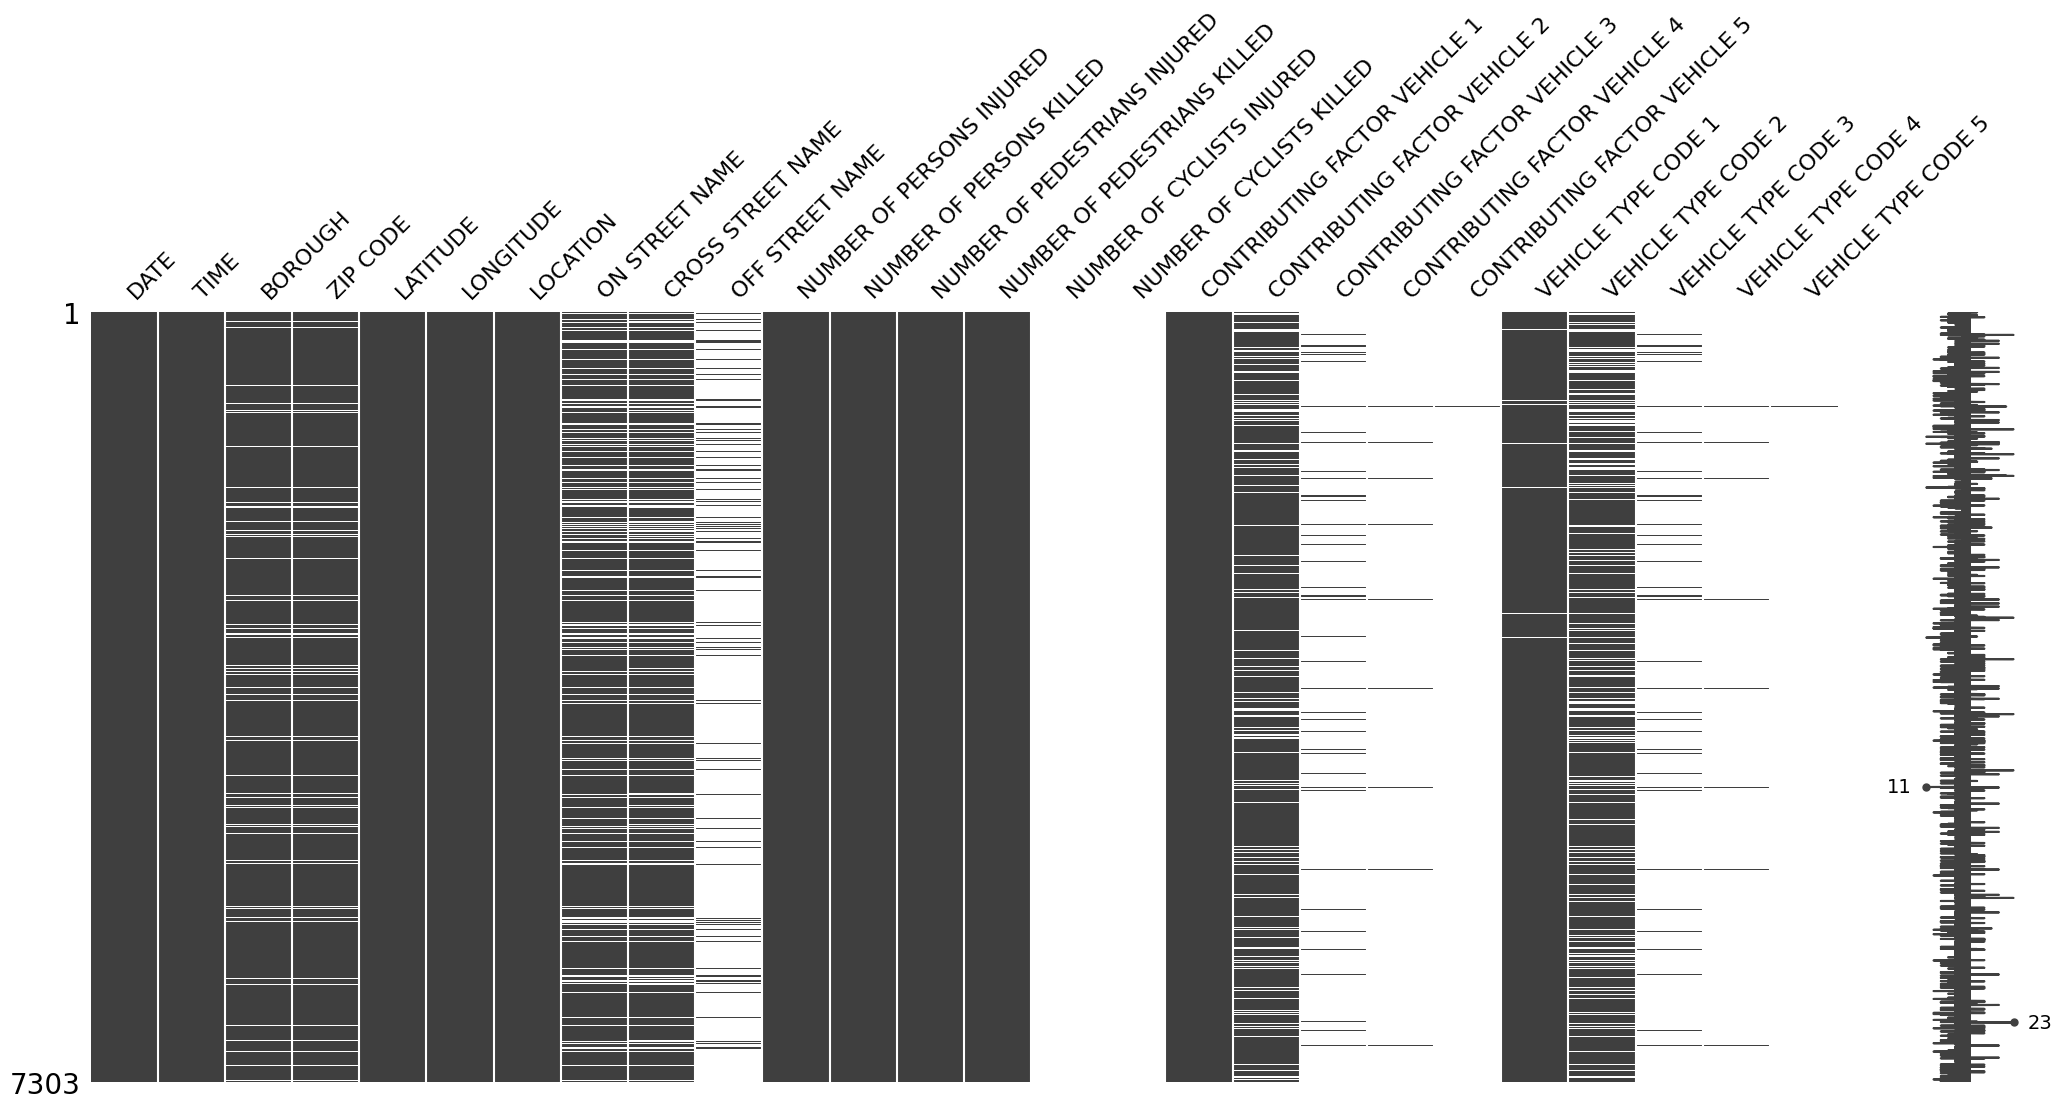

In [136]:
import missingno as msno
msno.matrix(collisions)

右側のバーは、各行ごとに非欠損値の個数を線グラフとして表示しており、欠損値の重なりが多いとグラフは小さな値になる\
**非欠損値であることに注意**すること

さらに、heatmapメソッドを利用することで欠損値と発生箇所の相関もわかる。見方の概要は次のとおりである

- ヒートマップには相関値が示される。-1から1の値をとり、丸めて0になる場合 (>-0.05 or < 0.05)、数値は表示されない

- 欠損値のない値はヒートマップに現れない

- -1の場合は左のカラムが欠損している一方で、下のカラムが全て欠損していないことを示す

- 1の場合は、左のカラムが欠損しており、さらに、下のカラムも全て欠損していることを表す

<Axes: >

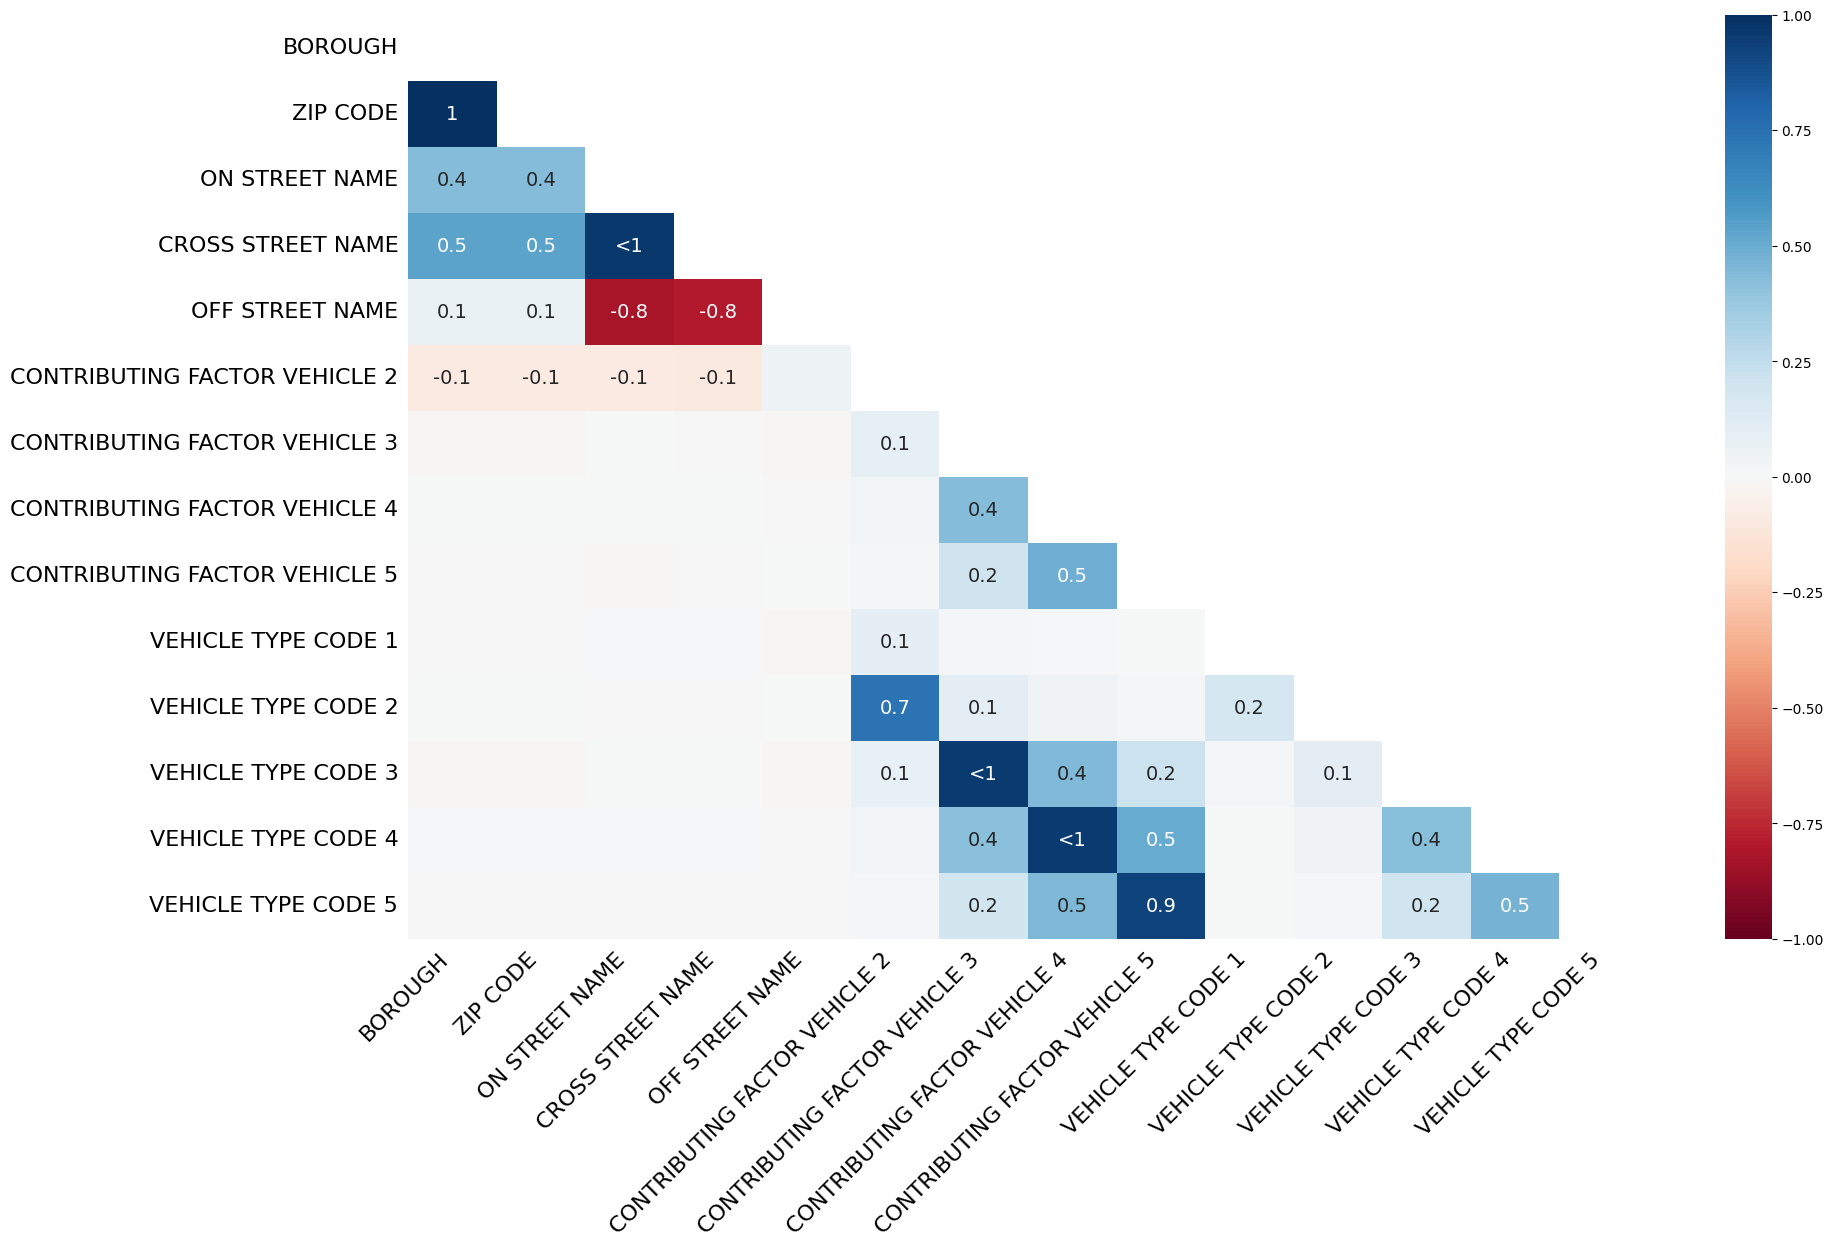

In [137]:
msno.heatmap(collisions)

より地道な方法として、単純にisnull()で NULLの数を調べ、それをsum()で数え上げてみる

In [138]:
collisions.isnull().sum()

DATE                                0
TIME                                0
BOROUGH                           383
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                   1065
CROSS STREET NAME                1137
OFF STREET NAME                  6542
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    1085
CONTRIBUTING FACTOR VEHICLE 3    7000
CONTRIBUTING FACTOR VEHICLE 4    7244
CONTRIBUTING FACTOR VEHICLE 5    7289
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1520
VEHICLE TYPE CODE 3              7019
VEHICLE TYPE CODE 4              7249
VEHICLE TYPE CODE 5              7291
dtype: int64

それぞれのカラム毎にどのくらいのnullが存在し、また値のバリエーションがどの程度あるか調べるには次のようにすると良い
- `count()`: 欠損値NaNではない要素の数をpandas.Seriesやスカラー値として取得する
- `isnull()`: isnaと同じで欠損値であればTrueになる
- `sum()`： Trueつまり1の数を数え上げるため、Trueの総数を計算することになる

In [139]:
def chknull(df):
  for i in df.columns:
    nall = df[i].count()
    nnul = df[i].isnull().sum()
    if(nall == 0):
      np = "-"
    else:
      np = str(round(float(nnul)/float(len(df))*100, 2))
    print("* " + i + "\t#:" + str(nall) +
      "\t# of NULL:" + str(nnul)+
      "\t% of NULL:" + np +
      "\t# of Orig:" + str(df[i].value_counts().count()))
chknull(collisions)

* DATE	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:215
* TIME	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:931
* BOROUGH	#:6920	# of NULL:383	% of NULL:5.24	# of Orig:5
* ZIP CODE	#:6919	# of NULL:384	% of NULL:5.26	# of Orig:177
* LATITUDE	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:5728
* LONGITUDE	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:5728
* LOCATION	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:5738
* ON STREET NAME	#:6238	# of NULL:1065	% of NULL:14.58	# of Orig:1671
* CROSS STREET NAME	#:6166	# of NULL:1137	% of NULL:15.57	# of Orig:1935
* OFF STREET NAME	#:761	# of NULL:6542	% of NULL:89.58	# of Orig:757
* NUMBER OF PERSONS INJURED	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:9
* NUMBER OF PERSONS KILLED	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:2
* NUMBER OF PEDESTRIANS INJURED	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:4
* NUMBER OF PEDESTRIANS KILLED	#:7303	# of NULL:0	% of NULL:0.0	# of Orig:2
* NUMBER OF CYCLISTS INJURED	#:0	# of NULL:7303	% of NULL:-	# of Orig:0
* NUMBER OF C

## 削除

削除には、pandasのdropnaメソッドを利用する

#### まとめて削除する
- `how='all'`とするとすべての値が欠損値である行が削除される
- `axis=1`とすると、すべての値が値が欠損値である列が削除される
- `how='any'`とすると、一つでも欠損値がある行が削除され、行ではaxis=1が利用できる
- `thresh=3`とすると欠損値ではない要素の数が3個以上含まれている行が残り、それ以外の行（欠損値ではない要素の数が2個以下の行）が削除される

なお、行も列も消したい場合の推奨方法は、メソッドを2回呼ぶことである

```
df.dropna(how='all').dropna(how='all', axis=1)
```

#### 狙って削除する

特定の行・列を基準に削除したい場合は、引数subsetに対象とする行ラベル・列ラベルをリストで指定する\
例えば`subset=['name']`と指定する

デフォルトではsubsetで指定した列のいずれかに欠損値がある行を削除する

- `how='all'`とすると、指定した列すべてが欠損値である行のみを削除する
- `axis=1`とすると、subsetで指定した行に欠損値がある列を削除することができ、引数howも利用できる

ZIP CODEがない場合、BOROUGH（自治区）もないため、単純に削除する\
削除した結果をcollisions_r1 に代入する

In [140]:
collisions_r1 = collisions.dropna(subset=['ZIP CODE'])

全く値の入っていない列があるため、これらを削除し、削除した結果をcollisions_r2に入れる
- NUMBER OF CYCLISTS INJURED	などが削除されていることを確認する

In [141]:
collisions_r2 = collisions_r1.dropna(how='all', axis=1)
collisions_r2.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,1,0,1,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [142]:
collisions_r2.shape

(6919, 24)

## 補完

データ量が少ない場合などでは、単純に削除するとデータ量が少なくなりムダかつ妥当性や学習結果に支障が出る可能性がある
- そこで、なにかしらデータを補完する
- データを眺めたあと、どのような形で補完するかを決定すること

以下に単純な数値データの補完方法について述べる

- ラベル情報（文字情報など）の補完には、クラスタリングといった手法が別途必要となり、特に大量に補完する場合は注意が必要である

そもそも、その準備したデータに問題がないのかを常に疑うこと
- 大量に補完したデータを学習に利用すれば、「学習で補完したデータを使って学習する」つまり、学習に都合の良いデータを使って学習しており、本来の意味が薄れている
- ここでは、kaggleを使う

これで、
- Scikit-learn 付属のデータセット
- Quiltのデータセット
- Kaggleのデータセット

以上が利用できるようになったはずである

特にKaggleは、「The Home of Data Science & Machine Learning」（データサイエンスと機械学習の家）と題されている通り、世界中の機械学習・データサイエンスに携わっている約40万人の方が集まるコミニティーである

- 企業や政府などの組織とデータ分析のプロであるデータサイエンティスト/機械学習エンジニアを繋げるプラットフォームであり、企業や政府がコンペ形式（競争形式）で課題を提示し、賞金と引き換えに最も精度の高い分析モデルを買い取るといったサービスが提供されている
- Kaggleコンペで上位に入ると、著名企業からハンティングされる可能性あり

その中でもよく学習や例題に使われる、Titanic: Machine Learning from Disasterを利用する
- これは、著名な豪華客船タイタニック号が沈没したときの乗客員のデータである
- 多くの乗客が死亡してしたため、後から確認できない項目も多く欠損値が含まれるデータとなっている

[https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)本来はこちらから入手するが、入手にはアカウントの登録が必要である

- アクセスしたら、Dataタブを選び、Data Sourcesから、test.csvとtrain.csvをクリックして、ダウンロードする

同じデータは、こちらにも配置しているので、以下を用いるとよい
- なお、コードは自動でダウンロードするように設計しているのでダウンロードする必要はない
  - [train.csvはここをクリックするとダウンロードできる](http://class.west.sd.keio.ac.jp/dataai/data/train.csv)
  - [test.csvはここをクリックするとダウンロードできる](http://class.west.sd.keio.ac.jp/dataai/data/train.csv)

簡単に済ますには、次のセルを実行して取得し、/contentの中に保存する
- データを読み込むと自動的に/contentの中に入る
- 読み込んだら、ファイルから、train.csvをクリックして中身を見て、Ageの欠損について確認する

In [143]:
import os
if not os.path.exists('train.csv'):
  #!wget "https://drive.google.com/uc?export=download&id=1OnwqCkFYr49GuEeB6NSHt7kzOOEy80oF" -O train.csv
  !wget https://keio.box.com/shared/static/h4xfiaehi5vt9exmz246gnvm23qnpjlb -O train.csv
if not os.path.exists('test.csv'):
  #!wget "https://drive.google.com/uc?export=download&id=1OosaY5iW9O00IR-TwJQMb3o1ydVUG33a" -O test.csv
  !wget https://keio.box.com/shared/static/plxazmlkvooo35id3hcetdixm39r2gs6 -O test.csv

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### 単純に平均値/最頻値を入れる
単純に平均値/最頻値をいれてしまう方法である
- まずデータをコピーしている
- pythonで=を使って値をコピーすると痛い目に合うのは**あるある**である
  - `a = b`はコピーではなく参照、つまり同じ変数の保存場所をどちらも指しているので、bを変更するとaも変更されてしまう
  - `a = b.copy()`とするとaは別メモリに保存されbの変更の影響を受けない
  - ところが、オブジェクトの中にオブジェクトがある場合(配列の配列など)は、残念ながらその中のオブジェクトを変更すると変更されてしまう
  - そこで、`import copy`として、`a = copy.deepcopy(b)`とすると、完全に中身も含めてコピーされる

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

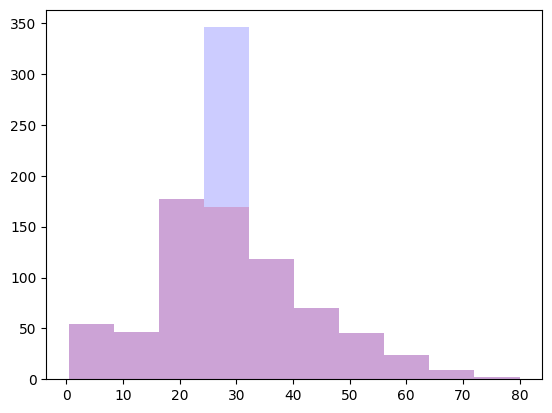

In [145]:
import copy
train_df_original = copy.deepcopy(train_df)
plt.hist(train_df_original["Age"].dropna(), alpha=0.2,color="r") #もともとのグラフを赤で描画
plt.hist(train_df["Age"].fillna(train_df["Age"].mean()),alpha=0.2,color="b") #平均値をいれたグラフを青で描画

### 平均からばらつきを考慮して補完する
平均値から標準偏差でばらつきを考慮して補完する方法を示す
- まずは、共通する処理として、平均・標準偏差・null数を取得しておく

In [146]:
Age_average = train_df["Age"].mean() #平均値
Age_std = train_df["Age"].std()  #標準偏差
Age_nullcount = train_df["Age"].isnull().sum() #null値の数＝補完する数

次に、正規分布に従うとし、標準偏差の範囲内でランダムに数字を作る

<ipython-input-147-388793761821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_rand["Age"][np.isnan(train_df["Age"])] = rand


(array([ 54.,  56., 221., 214., 180.,  86.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

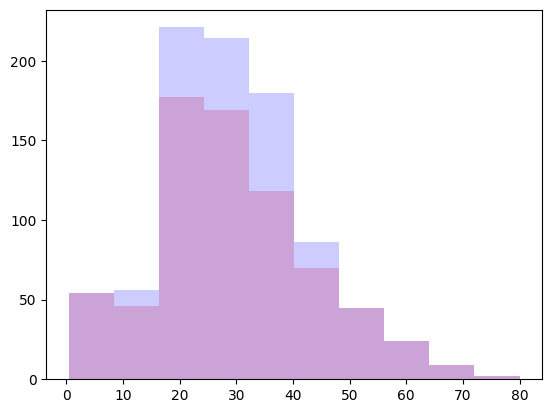

In [147]:
rand = np.random.randint(Age_average - Age_std, Age_average + Age_std , size = Age_nullcount)
#Ageの欠損値
train_df_rand = copy.deepcopy(train_df_original)
train_df_rand["Age"][np.isnan(train_df["Age"])] = rand
#グラフ描画
plt.hist(train_df_original["Age"].dropna(), alpha=0.2,color="r")
plt.hist(train_df_rand["Age"],alpha=0.2,color="b")

### 補完の考え方

上記の補完方法を採用してよいかどうかは、それぞれの問題に即して考えなければならない

欠損値の生成過程に関して、次の3パターンのいずれであるかを考慮する必要がある

- MCAR(Missing completely at random)

 完全にランダムに欠損しているパターンであり、例えば、データシートにコーヒーをこぼしたや、メモリに宇宙線がランダムに打ち込まれ、データが化けたといった場合である
 - この場合の対処は容易であり、上記の方法で問題ない

- MAR(Missing at random)

 そのデータの他の特徴量に依存して欠損するパターンであり、例えば、日本人の信仰は"無"が多いなど、そもそも欠損することが別の理由で一般的な場合を指す
  - そもそも、欠損していることが普通であることから、補完せず、欠損そのものに別のラベルを与えるべきであろう

- MNAR(Missing not at random)

 欠損となった値自体に依存して欠損するパターンであり、例えば、かなり古いがさだまさしの歌にあるように、O型だから(馬鹿にされることが多く)血液型を答えたくない場合もあるであろう
 - この場合の対処は難しく、欠損値がどの生成パターン由来かは、可視化して確かめる必要があり、適切に対処されなければならない

### 対策のまとめ

- 削除手法
 - リストワイズ：欠損値を含むデータを削除
 - ペアワイズ：2つの特徴量の相関をプロットする際などに、NaNがあり不都合が生じる計算だけ無視する。
- 単一代入補完手法
 - 統計量の代入：平均値や最頻値、中央値などを代入し補完
 - 回帰代入法：欠損値の無いサンプルから回帰して補完
 - 確率的回帰代入法：回帰代入法の結果にノイズを加えて補完
- 完全情報最尤推定手法
 - FIML(full maximum likelihood method)：最尤推定(with EM)で補完
- 多重代入補完  MI(multiple imputation)
 - 欠損値を様々な単一代入補完したデータセットを複数作成し、各データセットで分析を行い、その結果を統合し欠損値を補完
- 機械学習的なアプローチ
 - weighted k-nearest neighbour algorithm (kNN)：kNNでいくつか近傍データを探してきて、重み付け和で欠損値を補完
 - Random Forestを用いた欠測データの補完とその応用による方法：RのMissForestや、FIML・MIといった手法


## 実践的な補完方法

### interpolate()の基本的な使い方
以下のpandas.DataFrameを例に補完方法について述べる

In [148]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'col1': [0, np.nan, np.nan, 3, 4],
                   'col2': [np.nan, 1, 2, np.nan, np.nan],
                   'col3': [4, np.nan, np.nan, 7, 10]})
df

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


デフォルトでは各列に対して線形補間を行う
- 下端の欠損値には同じ値が繰り返される
- 上端の欠損値はそのままとなる

In [149]:
df.interpolate()

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


引数axis=1とすると各行に対して補間される
- 右端の欠損値には同じ値が繰り返される
- 左端の欠損値はそのままとなる


In [150]:
df.interpolate(axis=1)

,col1,col2,col3
0,0.0,2.0,4.0
1,NaN,1.0,1.0
2,NaN,2.0,2.0
3,3.0,5.0,7.0
4,4.0,7.0,10.0


引数limitにより、欠損値が連続している場合、最大でいくつの欠損値を補間するかを指定することができる
- デフォルトはNoneで連続する欠損値すべてが補間される

In [151]:
df.interpolate(limit=1)

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,NaN,10.0


補間方向は引数limit_directionで'forward', 'backward', 'both'のいずれかを指定する
- デフォルトは'forward'である

In [152]:
df.interpolate(limit=1, limit_direction='forward') # col2,0はNaNのまま

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,NaN,10.0


In [153]:
df.interpolate(limit=1, limit_direction='backward') # col2,0が補完された

,col1,col2,col3
0,0.0,1.0,4.0
1,NaN,1.0,NaN
2,2.0,2.0,6.0
3,3.0,NaN,7.0
4,4.0,NaN,10.0


In [154]:
df.interpolate(limit=1, limit_direction='both')


,col1,col2,col3
0,0.0,1.0,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,NaN,10.0


補間対象領域は引数limit_areaで指定する。'inside'だと内挿のみ、'outside'だと外挿のみ、None（デフォルト）だと両方が対象となる
- 外挿については上述のlimit_directionで前方（上側・左側）、後方（下側・右側）、両方を指定できる

In [155]:
df.interpolate(limit_area='inside')

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,NaN,7.0
4,4.0,NaN,10.0


In [156]:
df.interpolate(limit_area='outside')

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,2.0,10.0


In [157]:
df.interpolate(limit_area='outside', limit_direction='both')

,col1,col2,col3
0,0.0,1.0,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,2.0,10.0


では、完全に補完つまり、NaNを無くすにはどうすればよいか？

In [158]:
df.interpolate(limit_direction='both')

,col1,col2,col3
0,0.0,1.0,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


- **おわかりいただけただろうか**

補間方法は第一引数methodに指定する
- デフォルトはmethod='linear'で線形補間である
  - まず、次のデータを準備する

In [159]:
s = pd.Series([0, np.nan, np.nan, np.nan, 4, np.nan, np.nan],
              index=[0, 2, 5, 6, 8, 10, 14])
s

0     0.0
2     NaN
5     NaN
6     NaN
8     4.0
10    NaN
14    NaN
dtype: float64

In [160]:
s.interpolate()

0     0.0
2     1.0
5     2.0
6     3.0
8     4.0
10    4.0
14    4.0
dtype: float64

method='linear'（デフォルト）ではインデックス列が数値でも特に考慮されないが、method='index'またはmethod='values'とするとインデックス列を考慮して補間される
- 但し、indexが数字であることが必須である

In [161]:
s.interpolate('index')

0     0.0
2     1.0
5     2.5
6     3.0
8     4.0
10    4.0
14    4.0
dtype: float64

In [162]:
s.interpolate('values')

0     0.0
2     1.0
5     2.5
6     3.0
8     4.0
10    4.0
14    4.0
dtype: float64

method='spline'とするとスプライン補間を行う
- 同時に引数orderに次数を指定する必要がある

これまでのsの値ではスプライン補完ができないので、新たに次の値を用いて確認する
- スプライン補間は常にインデックス列を考慮して補間される

In [163]:
s = pd.Series([0, 10, np.nan, np.nan, 4, np.nan, np.nan],
              index=[0, 2, 5, 6, 8, 10, 14])
s.interpolate('spline', order=2)

0      0.00
2     10.00
5     13.75
6     12.00
8      4.00
10   -10.00
14   -56.00
dtype: float64

### fillnaの例

まず、fillnaは、nanを埋めるための専用の関数である

直前の値を使って埋めていく


In [164]:
df.fillna(method='ffill')

,col1,col2,col3
0,0.0,NaN,4.0
1,0.0,1.0,4.0
2,0.0,2.0,4.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


直後の値を使って穴埋めをする

In [165]:
df.fillna(method='bfill')

,col1,col2,col3
0,0.0,1.0,4.0
1,3.0,1.0,7.0
2,3.0,2.0,7.0
3,3.0,NaN,7.0
4,4.0,NaN,10.0


平均値(df.mean())を用いて補完する方法は既に述べたが、他に中央値(df.median())や、最頻値(df.mode())を用いて補完する方法がある
- medianについては次の通りである

In [166]:
df.fillna(df.median())

,col1,col2,col3
0,0.0,1.5,4.0
1,3.0,1.0,7.0
2,3.0,2.0,7.0
3,3.0,1.5,7.0
4,4.0,1.5,10.0


### その他

補間方法としては、そのほか、'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'polynomial', 'piecewise_polynomial', 'from_derivatives', 'pchip’, ‘akima'が指定可能
- 特にtimeについて説明する
- 次のようなデータがあった場合、タイムスタンプに応じて補完される

In [167]:
df_nan = pd.DataFrame({'value': [1, np.nan, np.nan, np.nan, 31]},
                      index=pd.to_datetime(['2018-01-01', '2018-01-02', '2018-01-15', '2018-01-20', '2018-01-31']))
print(df_nan)
print(df_nan.interpolate())
print(df_nan.interpolate('time'))

            value
2018-01-01    1.0
2018-01-02    NaN
2018-01-15    NaN
2018-01-20    NaN
2018-01-31   31.0
            value
2018-01-01    1.0
2018-01-02    8.5
2018-01-15   16.0
2018-01-20   23.5
2018-01-31   31.0
            value
2018-01-01    1.0
2018-01-02    2.0
2018-01-15   15.0
2018-01-20   20.0
2018-01-31   31.0


# 課題3(データ補完の効果)

**[課題1]** 次のコードをコピーして実行し、結果も含めたノートブックを作成して提出しなさい

**[課題2]** pandasのシンプルな補完を使って動作を確認してみなさい

上記を一つのノートブックにして提出しなさい

**注意点**

ノートブックには次の内容を先頭に必ず記述すること

- 先頭セルはテキストで、

 「# **データシステムの知能化とデザイン**」と記載
- さらに「# 第3回課題」と記載
- 次に、「## 学籍番号」と「## 氏名」を記載

これは、全ての課題に共通する事項であり、忘れずに記載すること

まずはデータの準備をする
- またしても、作業ゲーである

pandasの補完もかなり強力であるが、さらに高度な補完を行うため、scikit-learnのIterativeImputerを用いる
- fancyimputeという補完ライブラリも存在するので確認するとよい

今回はメルボルンの住宅データを利用する
- どういうデータが入っているかだけ確認する

In [168]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
#使用カラムを限定する
usecols=['Rooms', 'Type', 'Price', 'Method', 'SellerG',
        'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']
if not os.path.exists('Melbourne_housing_FULL.csv'):
    !wget "https://drive.google.com/uc?export=download&id=1Ow53Wl7g40Pr1ExUoJ4P-IrSejpzUalt" -O Melbourne_housing_FULL.csv

df=pd.read_csv("Melbourne_housing_FULL.csv",usecols=usecols)


内容を確認する
- Pandas形式ならば安心してprintなしで全部表示してよい
- きちんと省略してくれる

In [169]:
df

,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,NaN,4019.0
1,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
3,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,NaN,4019.0
4,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,NaN,6543.0
34853,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0
34855,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


このデータについて、家賃以外の情報から家賃を当ててみよう
- なお、データには、そもそもPriceが設定されていないデータが存在していることがわかるので、これを削除しなければならない

In [170]:
df.dropna(subset=['Price'])

,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
4,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
5,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
6,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,NaN,6543.0
34853,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0
34855,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


マニアックだが、次のようにしても同じ結果が得られる
- これは、`==`の比較演算子が、np.nanの比較に対してFalseを返すということを知っているからできる方法

In [171]:
df[df["Price"]==df["Price"]]

,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
4,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
5,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
6,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,NaN,6543.0
34853,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0
34855,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


In [172]:
df.dropna(subset=['Price'], inplace=True) #inplaceでdfそのものを修正する
print("全データ数")
print(len(df["Rooms"])) # Roomsに欠損がないことを知っているので
print("\n欠損数の確認")
print(df.isnull().sum())
#カテゴリ値を数値変換
le = preprocessing.LabelEncoder()
df[[ 'Type', 'Method', 'SellerG']]=df[[ 'Type', 'Method', 'SellerG']].apply(le.fit_transform)
df_train=df.drop("Price",axis=1)
df_label=df["Price"].values
print("\n訓練データの確認")
print(df_train)
print("\n訓練ラベルの確認(つまりお部屋のお値段、これを当てる)")
print(df_label)

全データ数
27247

欠損数の確認
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Propertycount        3
dtype: int64

訓練データの確認
       Rooms  Type  Method  SellerG  Distance  Bedroom2  Bathroom  Car  \
1          2     0       1       32       2.5       2.0       1.0  1.0   
2          2     0       1       32       2.5       2.0       1.0  0.0   
4          3     0       3       32       2.5       3.0       2.0  0.0   
5          3     0       0       32       2.5       3.0       2.0  1.0   
6          4     0       4      206       2.5       3.0       1.0  2.0   
...      ...   ...     ...      ...       ...       ...       ...  ...   
34852      4     0       0      140       6.3       4.0       1.0  3.0   
34853      2     0       3      290       6.3       2.0       2.0 

マイクロソフトのLightGBMを利用して実際に学習させる
- 今回は、補完による性能への影響を見たいので、全て関数にしておく
- スコア(ロス関数の値)と、主要特徴量の一覧を返すが、ここでは主要特徴量は特に利用していない
  - 「どの特徴量が価格に大きな影響を与えるか」を影響力と共に知ることができるので、各自で試みると良い

In [173]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import copy
def run_model(df_train,df_label):
    params={
        'objective': 'regression',
        'random_state' : 1,
        "metric": "rmse",
        }
    kfold = 5
    score=0
    kf = KFold(n_splits=kfold,shuffle=True,random_state=94) #交差検証する関数を定義、データをkfold個にわけて1つをテスト用、残りを訓練に使う
    importance=0
    for i, (train_index, test_index) in enumerate(kf.split(df_train, df_label)): #定義したKFoldでdf_trainとdf_labelを分割
        print('[Fold %d/%d]' % (i + 1, kfold))
        X_train, X_valid = df_train.iloc[train_index], df_train.iloc[test_index] #train_indexなどは「選択した要素の配列」0から要素数あり、kfoldの確率で抜けている
        y_train, y_valid = df_label[train_index], df_label[test_index] #上と同様だが、要素が一つしかないのでこれでよい
        dtrain = lgb.Dataset(X_train, label=y_train) #まとめてデータセットを構成する
        dvalid = lgb.Dataset(X_valid, label=y_valid)
        bst = lgb.train(params, dtrain, num_boost_round=1000,valid_sets=[dtrain, dvalid])
        # LightGBMで学習、1000回試行して、ベストなものを返す
        importance += pd.DataFrame(bst.feature_importance(), index=df_train.columns, columns=['importance'])
        score+=bst.best_score["valid_1"]['rmse']
    return importance,score/5

では、まず最初に補完せずに、そのまま欠損を含むデータを利用して学習させてみる
- 意味合いとしては、欠損を欠損というデータとして扱うことになる
- 欠損に意味があれば、これもわるくないが、無作為に欠損する場合は場合は補完した方がよくなると考えられる
- importance、ここではimpだが、どの特徴量が最も結果にコミットしたかを与える
  - Distance(駅からの距離)、Propertycount(地区内の物件数)、Landsize(土地の面積)といった特徴量が価格に大きく影響していることがわかる

In [174]:
imp,score = run_model(df_train,df_label)
print(score)
print(imp)
scored = score

[Fold 1/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1042830.453962
[Fold 2/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1050089.052255
[Fold 3/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[L

In [175]:
#欠損値を補完関数IterativeImputerのデフォルトのBaysian Ridgeで補完
imp = IterativeImputer(max_iter=50, random_state=5) # 方法の定義
df_train_fi = pd.DataFrame(imp.fit_transform(df_train)) # 定義した方法を用いて実際に補完
df_train_fi.columns = df_train.columns # カラム情報もコピーしておく
imp,score = run_model(df_train_fi,df_label)
print(score)
scorei = score

[Fold 1/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1042830.453962
[Fold 2/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1050089.052255
[Fold 3/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2150
[L

In [176]:
#欠損値を補完関数IterativeImputerのKNeighborsRegressorで補完
from sklearn.neighbors import KNeighborsRegressor
imp = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=15),max_iter=10,random_state=0)
df_train_fk = pd.DataFrame(imp.fit_transform(df_train))
df_train_fk.columns = df_train.columns
imp,score = run_model(df_train_fk,df_label)
print(score)
scorek = score

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[Fold 1/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1508
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1042830.453962
[Fold 2/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1050089.052255
[Fold 3/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003336 seconds.
You can set `force_col_wise=tr

結果をみてみよう
- 結果は、RMSEであり、小さい方が良い結果といえる

In [177]:
print("結果")
print("何もしない", scored)
print("Baysian Ridge", scorei)
print("KNeighborsRegressor", scorek)

結果
何もしない 300266.36862001906
Baysian Ridge 307807.8609853602
KNeighborsRegressor 309621.75748651166


補完に時間のかかる高度な方法を採用したからと言って、結果が良くなるとは限らない
- もちろん、これがLightGBMの特徴といえるかもしれない
- 欠損補完の目的の一つは、「欠損していることを特徴として利用するのではなく、統計的観点からバイアスなく統計処理を行う」ことにあるため、目的を見極めて補完の利用を考える必要がある

では、Pandasで補完してみよう

In [178]:
#pandasで補完
dfp = df_train.interpolate(limit_direction='both')
df_train_fp=pd.DataFrame(dfp)
df_train_fp.columns=df_train.columns
imp,score=run_model(df_train_fp,df_label)
print(score)
scorep = score

[Fold 1/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1853
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1042830.453962
[Fold 2/5]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 21797, number of used features: 12
[LightGBM] [Info] Start training from score 1050089.052255
[Fold 3/5]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002909 seconds.
You can set `force_col_wise=tr

In [179]:
print("結果")
print("何もしない", scored)
print("Baysian Ridge", scorei)
print("KNeighborsRegressor", scorek)
print("Pandasで補完", scorep)

結果
何もしない 300266.36862001906
Baysian Ridge 307807.8609853602
KNeighborsRegressor 309621.75748651166
Pandasで補完 318582.4338602943


さすがにpandasのinterpolateはだめだが、なんとなにもしないデータが最高性能をたたき出した
- そういうこともあるよという例
- おおよそこの授業は、まっとうな結果ではなく、どちらかというとイレギュラーな結果を示していることに注意すること
  - 今後様々なイレギュラーに遭遇すると思うが、それに対応できるように

**(意欲的な人向け)**

作業ゲーは嫌だという人向けに、以下、あくまでも任意ということで

- 何が原因かをデータの特徴やアルゴリズムの観点から調査してみよう
- このことから、どのような「背景」つまり、「住戸価格」という現実的な話において、何がいえるであろうか
  - そのことは普遍的に(例えば他の街や国でも)いえるだろうか
  - 結局、現実に何が起きているのかを把握することが重要であろう